In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('distancias_tiempos2.csv')
df

,Distance,Duration
0,0.000,0:00
1,15.260,0:22
2,14.930,0:17
3,23.420,0:33
4,9.490,0:12
...,...,...
11231,38.365,00:44
11232,9.674,00:24
11233,12.298,00:27
11234,5.247,00:17


In [3]:
df['Duration'] = pd.to_datetime(df['Duration'])

C:\Users\jmanu\AppData\Local\Temp\ipykernel_24944\1250093000.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Duration'] = pd.to_datetime(df['Duration'])


In [4]:
df['Duration'] = df['Duration'].dt.strftime('%H:%M')

In [5]:
df['Duration']=df['Duration'].astype('string')

In [6]:
df['Duration'].value_counts()

Duration
00:16    459
00:14    453
00:20    439
00:22    425
00:18    415
        ... 
01:37      2
01:32      2
01:36      1
01:42      1
01:35      1
Name: count, Length: 98, dtype: Int64

In [7]:

def convert_to_seconds(time_str):
    hours, minutes = map(int, time_str.split(':'))
    total_seconds = hours * 3600 + minutes * 60
    return total_seconds

# Apply the conversion function to the DataFrame column
df['Segundos'] = df['Duration'].apply(convert_to_seconds)

print(df)

       Distance Duration  Segundos
0         0.000    00:00         0
1        15.260    00:22      1320
2        14.930    00:17      1020
3        23.420    00:33      1980
4         9.490    00:12       720
...         ...      ...       ...
11231    38.365    00:44      2640
11232     9.674    00:24      1440
11233    12.298    00:27      1620
11234     5.247    00:17      1020
11235     0.000    00:00         0

[11236 rows x 3 columns]


In [8]:
df.to_numpy()

array([[0.0, '00:00', 0],
       [15.26, '00:22', 1320],
       [14.93, '00:17', 1020],
       ...,
       [12.298, '00:27', 1620],
       [5.247, '00:17', 1020],
       [0.0, '00:00', 0]], dtype=object)

In [9]:
rangos = np.arange(0,11236,106)
rangos

array([    0,   106,   212,   318,   424,   530,   636,   742,   848,
         954,  1060,  1166,  1272,  1378,  1484,  1590,  1696,  1802,
        1908,  2014,  2120,  2226,  2332,  2438,  2544,  2650,  2756,
        2862,  2968,  3074,  3180,  3286,  3392,  3498,  3604,  3710,
        3816,  3922,  4028,  4134,  4240,  4346,  4452,  4558,  4664,
        4770,  4876,  4982,  5088,  5194,  5300,  5406,  5512,  5618,
        5724,  5830,  5936,  6042,  6148,  6254,  6360,  6466,  6572,
        6678,  6784,  6890,  6996,  7102,  7208,  7314,  7420,  7526,
        7632,  7738,  7844,  7950,  8056,  8162,  8268,  8374,  8480,
        8586,  8692,  8798,  8904,  9010,  9116,  9222,  9328,  9434,
        9540,  9646,  9752,  9858,  9964, 10070, 10176, 10282, 10388,
       10494, 10600, 10706, 10812, 10918, 11024, 11130])

In [10]:
cuadrada = []
for i in range(len(rangos)-1):
    cuadrada.append(list((df['Segundos'][rangos[i]:rangos[i+1]])))
result_array = np.append(np.array(cuadrada), [(df['Segundos'][rangos[-1]:])], axis = 0)
result_array.shape

(106, 106)

In [11]:
result_array

array([[   0, 1320, 1020, ..., 1320, 1680, 2520],
       [1320,    0, 1380, ...,  360, 1320, 1620],
       [1200, 1440,    0, ..., 1440, 1680, 2520],
       ...,
       [1260,  360, 1320, ...,    0, 1320, 1860],
       [1800, 1320, 1680, ..., 1440,    0,  660],
       [2220, 1560, 2700, ..., 1620, 1020,    0]], dtype=int64)

In [12]:
cuadrada = []
for i in range(len(rangos)-1):
    cuadrada.append(list((df['Distance'][rangos[i]:rangos[i+1]])))
resulta_array = np.append(np.array(cuadrada), [(df['Distance'][rangos[-1]:])], axis = 0)
resulta_array

array([[ 0.   , 15.26 , 14.93 , ..., 15.16 , 24.76 , 31.94 ],
       [15.51 ,  0.   , 17.55 , ...,  1.86 , 10.65 , 16.77 ],
       [11.67 , 18.11 ,  0.   , ..., 18.01 , 23.91 , 31.09 ],
       ...,
       [15.121,  2.167, 17.156, ...,  0.   , 15.432, 18.173],
       [26.424, 10.423, 24.087, ..., 11.239,  0.   ,  8.665],
       [32.06 , 11.135, 26.674, ..., 12.298,  5.247,  0.   ]])

In [13]:
dm = pd.read_csv('lat_lon.csv')
dm = dm.rename(columns={'Latitude (y)': 'LAT', 'Longitude (x)': 'LON'})

In [14]:
dm

,LAT,LON
0,25.686514,-100.273998
1,25.743325,-100.354555
2,25.625977,-100.304001
3,25.763782,-100.408236
4,25.636985,-100.287403
...,...,...
101,25.644937,-100.278932
102,25.737479,-100.408655
103,25.745256,-100.343669
104,25.762550,-100.425484


In [15]:
coordenadas = [tuple(array) for array in dm.to_numpy()]

## Cluster con las direcciones

In [16]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interactive
from collections import defaultdict
import hdbscan
import folium
import re
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
        '#000075', '#808080']*10
sns.set(style="white")

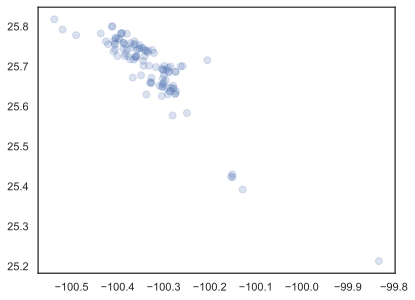

In [17]:
X = np.array(dm[["LON", "LAT"]], dtype="float64")
plt.scatter(X[:,0], X[:,1], alpha=0.2, s=50)

In [18]:
m = folium.Map(location=[dm.LAT.mean(), dm.LON.mean()], zoom_start=9, 
               tiles='OpenStreet Map')
for _, row in dm.iterrows():
    folium.CircleMarker(
        location=[row.LAT, row.LON],
        radius=5,
        color='#1787FE',
        fill=True,
        fill_colour='#1787FE'
    ).add_to(m)

m

## Kmeans

In [19]:
X = np.array(dm[['LON', 'LAT']], dtype='float64')
k = 8
model = KMeans(n_clusters=k, random_state=17).fit(X)
class_predictions = model.predict(X)
dm[f'CLUSTER_kmeans{k}'] = class_predictions

c:\Users\jmanu\miniconda3\envs\JML\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jmanu\miniconda3\envs\JML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\jmanu\miniconda3\envs\JML\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jmanu\miniconda3\envs\JML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


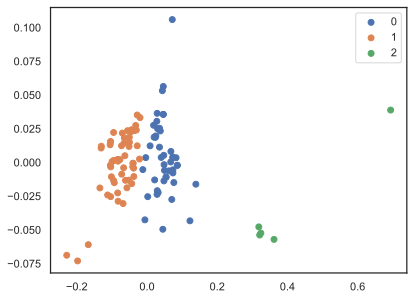

In [25]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(dm[["LON", "LAT"]])
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [23]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

c:\Users\jmanu\miniconda3\envs\JML\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jmanu\miniconda3\envs\JML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jmanu\miniconda3\envs\JML\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jmanu\miniconda3\envs\JML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

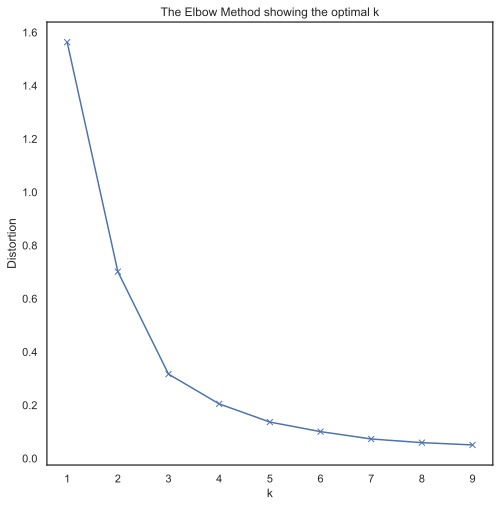

In [27]:
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [26]:
label

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1,
       1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1])